In [8]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np
from shapely.geometry import Point
from matplotlib.lines import Line2D

# Suppress warnings
ox.settings.log_console = False
ox.settings.use_cache = True

In [9]:

place = "Islamabad, Pakistan"

boundary = ox.geocode_to_gdf(place)
# Islamabad
latitude = 33.6844
longitude = 73.0479

gdf = gpd.GeoDataFrame(
    {'geometry': [Point(longitude, latitude)]},
    crs="EPSG:4326"  # WGS84
)


gdf_utm = ox.projection.project_gdf(gdf)
gdf_utm.to_file("utm_point.gpkg", driver="GPKG")



In [10]:
gdf_utm = gpd.read_file("utm_point.gpkg")

utm_crs = gdf_utm.crs
print("UTM CRS:", utm_crs)

UTM CRS: EPSG:32643


In [11]:
# Retrieve POIs with tags
pois = ox.features_from_place(place, {
    'amenity': ['hospital', 'university', 'college'],
    'shop': ['supermarket', 'mall'],
    'building': ['retail', 'commercial']
})


In [12]:

def filter_pois(df, conditions):
    return df[conditions][['geometry', 'name']].copy()

hospitals = filter_pois(pois, pois['amenity'] == 'hospital').assign(type='hospital')
universities = filter_pois(pois, pois['amenity'].isin(['university', 'college'])).assign(type='education')
markets = filter_pois(pois, pois['shop'].isin(['supermarket','mall']) | 
                   pois['building'].isin(['retail','commercial'])).assign(type='market')

all_pois = gpd.GeoDataFrame(
    gpd.pd.concat([hospitals, universities, markets]), 
    crs=pois.crs
)

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

In [13]:
# Convert polygons to points
all_pois.geometry = all_pois.geometry.apply(
    lambda geom: geom.centroid if geom.type in ['Polygon','MultiPolygon'] else geom
)

/tmp/ipykernel_26036/4254518540.py:3: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  lambda geom: geom.centroid if geom.type in ['Polygon','MultiPolygon'] else geom


In [14]:
all_pois

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


geometry  \
element_type osmid                                   
node         240218764   POINT (73.04176 33.71047)   
             253018400   POINT (73.08281 33.72110)   
             297648462   POINT (73.07944 33.70544)   
             312719028   POINT (73.01704 33.71562)   
             1668718996  POINT (73.17540 33.64542)   
...                                            ...   
way          1272669631  POINT (72.99041 33.68410)   
             1272669632  POINT (72.98959 33.68424)   
             1272669633  POINT (72.99010 33.68368)   
             1287040086  POINT (73.04071 33.64853)   
             1300665433  POINT (72.87585 33.62442)   

                                                                      name  \
element_type osmid                                                           
node         240218764                                  Ali Medical Centre   
             253018400                                Poly Clinic Hospital   
             297648462   Islamabad International َDental Hospital and C...   
             312719028                                        PAF Hospital   
             1668718996                           Shakeela Shabir Hospital   
...                                                                    ...   
way          1272669631                                                NaN   
             1272669632                                                NaN   
             1272669633                                                NaN   
             1287040086                                       Makkah Plaza   
             1300665433                                                NaN   

                             type  
element_type osmid                 
node         240218764   hospital  
             253018400   hospital  
             297648462   hospital  
             312719028   hospital  
             1668718996  hospital  
...                           ...  
way          1272669631    market  
             1272669632    market  
             1272669633    market  
             1287040086    market  
             1300665433    market  

[487 rows x 3 columns]

In [15]:
all_pois.to_file("all_pois.gpkg", layer='pois', driver="GPKG")


/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [16]:
all_pois = gpd.read_file("all_pois.gpkg", layer='pois')


In [17]:
all_pois

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


element_type       osmid  \
0           node   240218764   
1           node   253018400   
2           node   297648462   
3           node   312719028   
4           node  1668718996   
..           ...         ...   
482          way  1272669631   
483          way  1272669632   
484          way  1272669633   
485          way  1287040086   
486          way  1300665433   

                                                  name      type  \
0                                   Ali Medical Centre  hospital   
1                                 Poly Clinic Hospital  hospital   
2    Islamabad International َDental Hospital and C...  hospital   
3                                         PAF Hospital  hospital   
4                             Shakeela Shabir Hospital  hospital   
..                                                 ...       ...   
482                                               None    market   
483                                               None    market   
484                                               None    market   
485                                       Makkah Plaza    market   
486                                               None    market   

                      geometry  
0    POINT (73.04176 33.71047)  
1    POINT (73.08281 33.72110)  
2    POINT (73.07944 33.70544)  
3    POINT (73.01704 33.71562)  
4    POINT (73.17540 33.64542)  
..                         ...  
482  POINT (72.99041 33.68410)  
483  POINT (72.98959 33.68424)  
484  POINT (72.99010 33.68368)  
485  POINT (73.04071 33.64853)  
486  POINT (72.87585 33.62442)  

[487 rows x 5 columns]

In [18]:
# bus-compatible roads
G = ox.graph_from_polygon(
    boundary.geometry.iloc[0], 
    network_type='drive',  
    truncate_by_edge=True
)


boundary = boundary.to_crs(utm_crs)
all_pois = all_pois.to_crs(utm_crs)
G = ox.project_graph(G, to_crs=utm_crs)



/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

In [19]:
ox.save_graphml(G, filepath="network.graphml")

In [20]:
G = ox.load_graphml("network.graphml")


In [21]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
major_roads = edges[edges['highway'].isin(['primary', 'secondary', 'trunk'])]

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

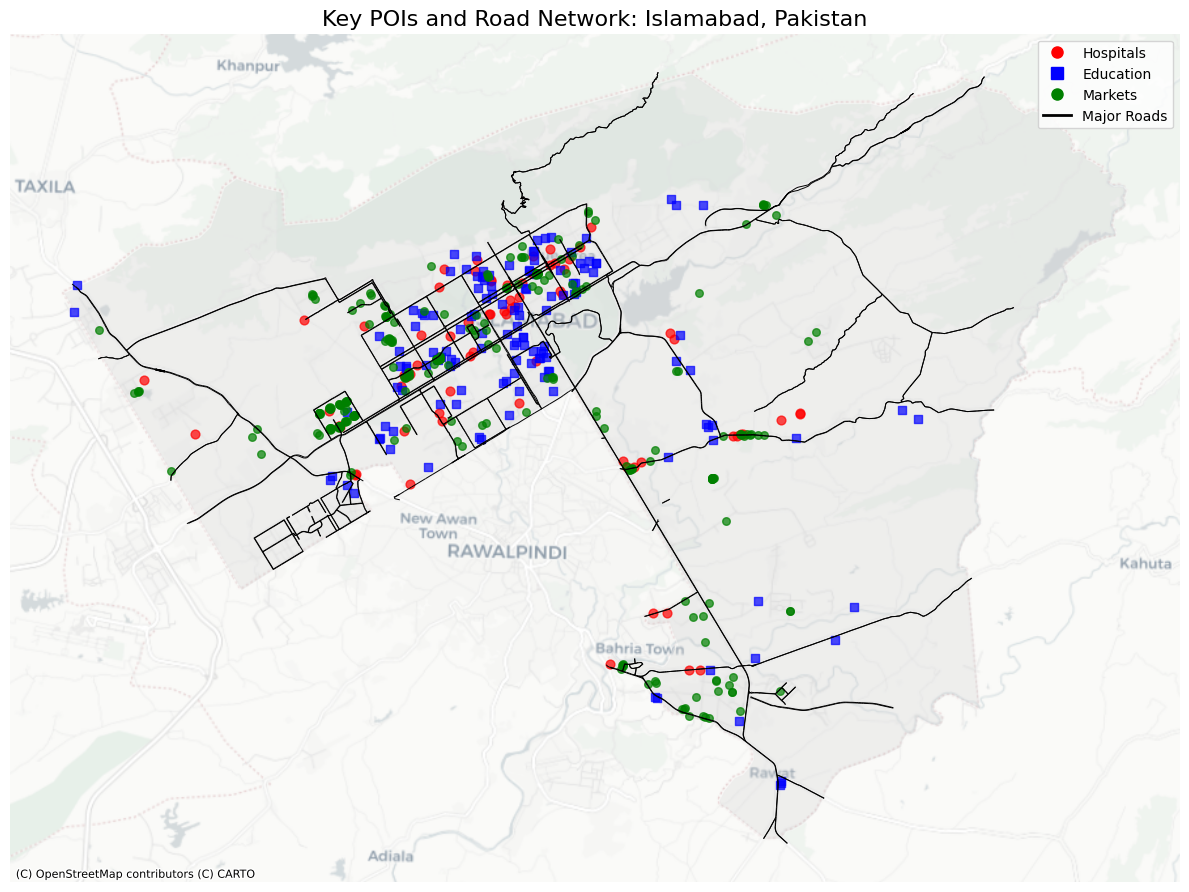


POIs Found in Islamabad:
- Hospitals: 75
- Education Institutions: 139
- Markets: 273
- Total POIs: 487
- Road Network: 96504 edges



In [22]:
# VISUALIZATION 
fig, ax = plt.subplots(figsize=(12, 10))

boundary.plot(ax=ax, color='lightgray', edgecolor='white', alpha=0.3)
major_roads.plot(ax=ax, color='black', linewidth=0.7)

poi_colors = {'hospital': 'red', 'education': 'blue', 'market': 'green'}
for ptype, color in poi_colors.items():
    subset = all_pois[all_pois['type'] == ptype]
    subset.plot(ax=ax, color=color, markersize=30 + 10*(ptype == 'hospital'), 
               alpha=0.7, marker='o' if ptype != 'education' else 's')

ctx.add_basemap(ax, crs=utm_crs, source=ctx.providers.CartoDB.Positron)

legend_elements = [
    Line2D([0], [0], color='red', lw=0, marker='o', markersize=8, label='Hospitals'),
    Line2D([0], [0], color='blue', lw=0, marker='s', markersize=8, label='Education'),
    Line2D([0], [0], color='green', lw=0, marker='o', markersize=8, label='Markets'),
    Line2D([0], [0], color='black', lw=2, label='Major Roads')
]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_title(f"Key POIs and Road Network: {place}", fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.savefig('islamabad_pois_network.png', dpi=300)
plt.show()

print("\n" + "="*50)
print(f"POIs Found in Islamabad:")
print(f"- Hospitals: {len(hospitals)}")
print(f"- Education Institutions: {len(universities)}")
print(f"- Markets: {len(markets)}")
print(f"- Total POIs: {len(all_pois)}")
print(f"- Road Network: {len(edges)} edges")
print("="*50 + "\n")


/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

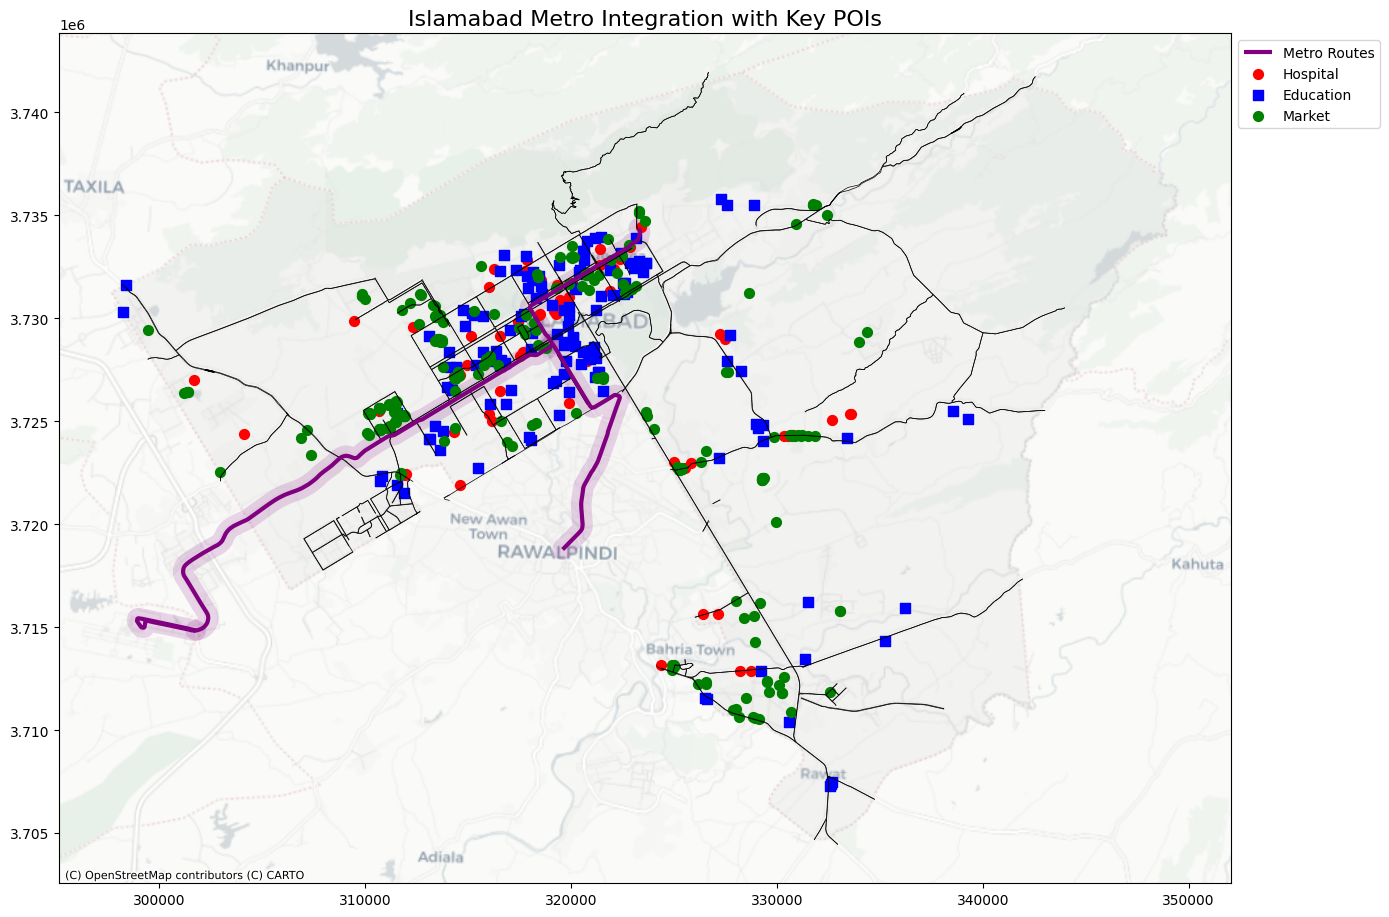

In [23]:
metro_routes = gpd.read_file('metro-data/islamabad_sections.geojson').to_crs(utm_crs)
metro_service_areas = gpd.GeoDataFrame(geometry=metro_routes.buffer(500), crs=utm_crs)
fig, ax = plt.subplots(figsize=(14, 12))


boundary.plot(ax=ax, color='lightgray', alpha=0.2)
major_roads.plot(ax=ax, color='black', linewidth=0.5)


metro_routes.plot(ax=ax, color='purple', linewidth=3, label='Metro Routes')
metro_service_areas.plot(ax=ax, color='purple', alpha=0.15, label='500m Service Area')


poi_colors = {'hospital':'red', 'education':'blue', 'market':'green'}
for ptype, color in poi_colors.items():
    all_pois[all_pois['type']==ptype].plot(
        ax=ax, color=color, markersize=50, marker='o' if ptype!='education' else 's',
        label=ptype.capitalize()
    )

ctx.add_basemap(ax, crs=utm_crs, source=ctx.providers.CartoDB.Positron)
ax.set_title("Islamabad Metro Integration with Key POIs", fontsize=16)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('metro_integration.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
import pandas as pd

underserved_pois = all_pois[~all_pois.geometry.within(metro_service_areas.unary_union)]

pop_df = pd.read_csv("pak_ppp_2020_1km_UNadj_ASCII_XYZ/ppp_PAK_2020_1km_Aggregated_UNadj.csv")  


geometry = [Point(xy) for xy in zip(pop_df.X, pop_df.Y)]
pop_gdf = gpd.GeoDataFrame(pop_df, geometry=geometry, crs="EPSG:4326")
pop_gdf = pop_gdf.to_crs(boundary.crs)

pop_isb = gpd.clip(pop_gdf, boundary)


pop_isb = pop_isb[pop_isb['Z'] > 0]

population= pop_isb.to_crs(utm_crs)

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

In [25]:
# Rename column
population = population.rename(columns={'Z': 'population'})

population.to_file("population_clusters.gpkg", driver="GPKG")
population = gpd.read_file("population_clusters.gpkg")


population = population.to_crs(metro_service_areas.crs)

# served vs unserved population
served_pop = population[population.geometry.within(metro_service_areas.unary_union)]
unserved_pop = population[~population.geometry.within(metro_service_areas.unary_union)]


print(f"""
Metro Accessibility Report:
- POIs served: {len(all_pois) - len(underserved_pois)}/{len(all_pois)} 
  ({len(underserved_pois)} underserved)
- Population served: {served_pop['population'].sum():,.0f} 
  ({unserved_pop['population'].sum():,.0f} unserved)
- Key underserved areas:
  {underserved_pois.groupby('type').size().to_dict()}
""")

underserved_pois.to_file('underserved_pois.gpkg', driver='GPKG')


/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(



Metro Accessibility Report:
- POIs served: 88/487 
  (399 underserved)
- Population served: 162,042 
  (1,871,057 unserved)
- Key underserved areas:
  {'education': 118, 'hospital': 60, 'market': 221}



/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

In [26]:
population


/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


X          Y  population                        geometry
0     72.911250  33.578750  411.617249  POINT (306144.704 3717405.086)
1     72.911250  33.587083  394.916626  POINT (306163.349 3718329.248)
2     72.919583  33.578750  424.695007  POINT (306918.248 3717389.514)
3     72.936250  33.587083  577.140930  POINT (308483.751 3718282.711)
4     72.927916  33.587083  609.963867  POINT (307710.285 3718298.161)
...         ...        ...         ...                             ...
1335  73.361250  33.745417  216.001633  POINT (348207.005 3735134.936)
1336  73.352916  33.745417  221.026733  POINT (347435.029 3735147.236)
1337  73.344583  33.745417  227.091141  POINT (346663.052 3735159.599)
1338  73.336250  33.745417  234.219177  POINT (345891.074 3735172.024)
1339  73.361250  33.753750  220.264755  POINT (348221.693 3736059.028)

[1340 rows x 4 columns]

In [27]:
unserved_pop

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


X          Y  population                        geometry
0     72.911250  33.578750  411.617249  POINT (306144.704 3717405.086)
1     72.911250  33.587083  394.916626  POINT (306163.349 3718329.248)
2     72.919583  33.578750  424.695007  POINT (306918.248 3717389.514)
3     72.936250  33.587083  577.140930  POINT (308483.751 3718282.711)
4     72.927916  33.587083  609.963867  POINT (307710.285 3718298.161)
...         ...        ...         ...                             ...
1335  73.361250  33.745417  216.001633  POINT (348207.005 3735134.936)
1336  73.352916  33.745417  221.026733  POINT (347435.029 3735147.236)
1337  73.344583  33.745417  227.091141  POINT (346663.052 3735159.599)
1338  73.336250  33.745417  234.219177  POINT (345891.074 3735172.024)
1339  73.361250  33.753750  220.264755  POINT (348221.693 3736059.028)

[1297 rows x 4 columns]

In [28]:
underserved_pois= gpd.read_file("underserved_pois.gpkg")

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

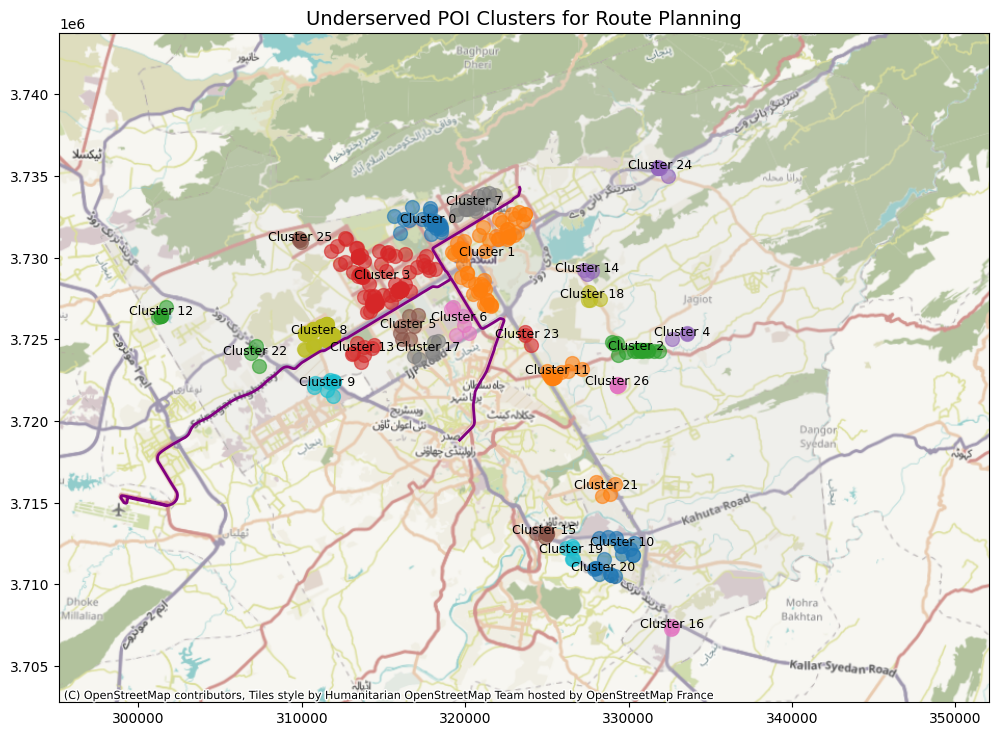

In [29]:
from sklearn.cluster import DBSCAN


coords = np.array([[p.x, p.y] for p in underserved_pois.geometry])
db = DBSCAN(eps=1000, min_samples=3).fit(coords)  # 1km radius, min 3 POIs

underserved_pois['cluster'] = db.labels_
valid_clusters = underserved_pois[underserved_pois['cluster'] != -1]

fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color='lightgray', alpha=0.2)
metro_routes.plot(ax=ax, color='purple', linewidth=2)

for cluster_id in valid_clusters['cluster'].unique():
    cluster = valid_clusters[valid_clusters['cluster'] == cluster_id]
    cluster.plot(ax=ax, markersize=100, alpha=0.6)
    ax.annotate(
        f"Cluster {cluster_id}", 
        (cluster.geometry.centroid.x.mean(), cluster.geometry.centroid.y.mean()),
        fontsize=9, ha='center'
    )

ctx.add_basemap(ax, crs=utm_crs)
plt.title("Underserved POI Clusters for Route Planning", fontsize=14)
plt.show()

In [31]:
stations_gdf = gpd.read_file("metro-data/stations.geojson")


stations_gdf["lon"] = stations_gdf.geometry.x
stations_gdf["lat"] = stations_gdf.geometry.y
stations_gdf["name"] = stations_gdf["name"]  


df = pd.DataFrame(stations_gdf[["name", "lon", "lat"]])
df["geometry"] = df.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)

stations_gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

metro_gdf = gpd.read_file("metro-data/islamabad_sections.geojson")

line = metro_gdf.geometry.iloc[0]
line_points = [Point(coord) for coord in line.coords]
line_gdf = gpd.GeoDataFrame(geometry=line_points, crs="EPSG:4326")


# dropping a perpendicular from the station point to the line, find how far the point is along line, interpolate will return the exact point on the line at that distance. 
stations_gdf["geometry"] = stations_gdf.geometry.apply(
    lambda station: line.interpolate(line.project(station))
)

stations_gdf.to_file("snapped_stations.geojson", driver="GeoJSON")


/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [32]:
stations_gdf

name        lon        lat  \
0                N-5 Metro Bus  72.943819  33.634119   
1     Nust/G-13 West Metro Bus  72.982786  33.651268   
2            NHA Metro Station  73.035657  33.679842   
3         Ibn e Sina Metro Bus  73.037546  33.698839   
4               PIMS Metro Bus  73.047674  33.709121   
5      Stock Exchange MetroBus  73.058488  33.714833   
6   Shaheed e Millat Metro Bus  73.078433  33.722556   
7      Parade Ground Metro Bus  73.084441  33.727553   
8    Metro Secretariat Station  73.093368  33.736975   
9    Faiz Ahmad Faiz Metro Bus  73.055774  33.679141   
10  Khayaban e Johar Metro Bus  73.059894  33.672284   
11           I-9 Metro Station  73.064872  33.663712   
12      Faizabad Metro Station  73.083068  33.663712   
13               Metro Station  73.078261  33.645136   
14           Police Foundation  73.006627  33.663905   
15                  High Court  73.015761  33.667428   
16                IJ principal  73.071694  33.656493   
17                     Potohar  73.065659  33.660925   
18             Kashmir Highway  73.048002  33.684262   
19                      Chaman  73.042908  33.690243   
20                    Katchery  73.041476  33.702444   
21                  7th Avenue  73.071468  33.718086   
22                 Secretariat  73.092382  33.735182   

                     geometry  
0   POINT (72.86494 33.55481)  
1   POINT (72.86494 33.55481)  
2   POINT (72.86494 33.55481)  
3   POINT (72.86494 33.55481)  
4   POINT (72.86494 33.55481)  
5   POINT (72.86494 33.55481)  
6   POINT (72.86494 33.55481)  
7   POINT (72.86494 33.55481)  
8   POINT (72.86494 33.55481)  
9   POINT (72.86494 33.55481)  
10  POINT (72.86494 33.55481)  
11  POINT (72.86494 33.55481)  
12  POINT (72.86494 33.55481)  
13  POINT (72.86494 33.55481)  
14  POINT (72.86494 33.55481)  
15  POINT (72.86494 33.55481)  
16  POINT (72.86494 33.55481)  
17  POINT (72.86494 33.55481)  
18  POINT (72.86494 33.55481)  
19  POINT (72.86494 33.55481)  
20  POINT (72.86494 33.55481)  
21  POINT (72.86494 33.55481)  
22  POINT (72.86494 33.55481)

In [33]:
stations_gdf= gpd.read_file("snapped_stations.geojson")

In [34]:
stations_gdf

name        lon        lat  \
0                N-5 Metro Bus  72.943819  33.634119   
1     Nust/G-13 West Metro Bus  72.982786  33.651268   
2            NHA Metro Station  73.035657  33.679842   
3         Ibn e Sina Metro Bus  73.037546  33.698839   
4               PIMS Metro Bus  73.047674  33.709121   
5      Stock Exchange MetroBus  73.058488  33.714833   
6   Shaheed e Millat Metro Bus  73.078433  33.722556   
7      Parade Ground Metro Bus  73.084441  33.727553   
8    Metro Secretariat Station  73.093368  33.736975   
9    Faiz Ahmad Faiz Metro Bus  73.055774  33.679141   
10  Khayaban e Johar Metro Bus  73.059894  33.672284   
11           I-9 Metro Station  73.064872  33.663712   
12      Faizabad Metro Station  73.083068  33.663712   
13               Metro Station  73.078261  33.645136   
14           Police Foundation  73.006627  33.663905   
15                  High Court  73.015761  33.667428   
16                IJ principal  73.071694  33.656493   
17                     Potohar  73.065659  33.660925   
18             Kashmir Highway  73.048002  33.684262   
19                      Chaman  73.042908  33.690243   
20                    Katchery  73.041476  33.702444   
21                  7th Avenue  73.071468  33.718086   
22                 Secretariat  73.092382  33.735182   

                     geometry  
0   POINT (72.86494 33.55481)  
1   POINT (72.86494 33.55481)  
2   POINT (72.86494 33.55481)  
3   POINT (72.86494 33.55481)  
4   POINT (72.86494 33.55481)  
5   POINT (72.86494 33.55481)  
6   POINT (72.86494 33.55481)  
7   POINT (72.86494 33.55481)  
8   POINT (72.86494 33.55481)  
9   POINT (72.86494 33.55481)  
10  POINT (72.86494 33.55481)  
11  POINT (72.86494 33.55481)  
12  POINT (72.86494 33.55481)  
13  POINT (72.86494 33.55481)  
14  POINT (72.86494 33.55481)  
15  POINT (72.86494 33.55481)  
16  POINT (72.86494 33.55481)  
17  POINT (72.86494 33.55481)  
18  POINT (72.86494 33.55481)  
19  POINT (72.86494 33.55481)  
20  POINT (72.86494 33.55481)  
21  POINT (72.86494 33.55481)  
22  POINT (72.86494 33.55481)

/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/smirfan/miniconda3/envs/spatial_env/lib/python3.10/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/home/sm

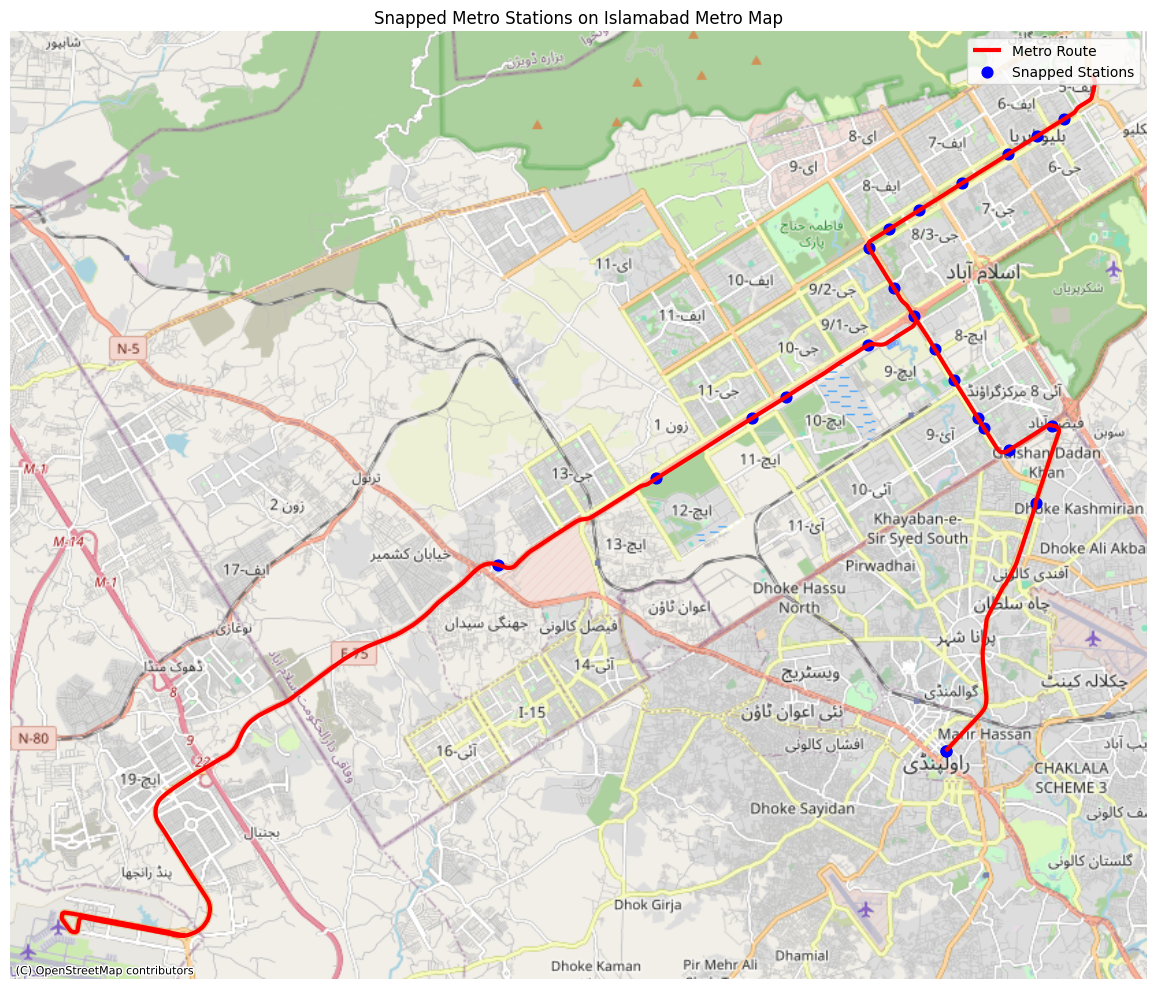

In [35]:
stations = gpd.read_file("metro-data/stations.geojson").to_crs("EPSG:4326")
metro = gpd.read_file("metro-data/islamabad_sections.geojson").to_crs("EPSG:4326")

metro_line = metro.unary_union

stations["geometry"] = stations.geometry.apply(
    lambda pt: metro_line.interpolate(metro_line.project(pt)) if metro_line.project(pt) else pt
)


stations.to_file("snapped_stations.gpkg", driver="GPKG")
stations= gpd.read_file("snapped_stations.gpkg")
stations_proj = stations.to_crs(epsg=3857)
metro_proj = metro.to_crs(epsg=3857)


fig, ax = plt.subplots(figsize=(12, 10))
metro_proj.plot(ax=ax, linewidth=3, color='red', label='Metro Route')
stations_proj.plot(ax=ax, color='blue', markersize=60, label='Snapped Stations')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Snapped Metro Stations on Islamabad Metro Map")
ax.legend()
ax.set_axis_off()
plt.tight_layout()
plt.show()